<center>


<img src="https://habrastorage.org/webt/jq/gc/r5/jqgcr5azmatev6zvgufn8xftehy.png">
    
#  **II Escuela de Verano en Física Computacional**

Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.

*También puede consultar la última versión de este notebook en nuestro [repositorio](https://github.com/PCPUNMSM) y los videos de clase [en nuestro canal de Youtube](https://www.youtube.com/channel/UCze8vzQLcplutz0nWDNjFCA).*
    

# <center> Lista de Ejercicios




### Problema 1:  Raíces de ecuaciones



La siguiente fórmula nos describe la velocidad ascendente v de un cohete:

$$v(t)=uln\left(\frac{m}{m-qt}\right)-gt$$

Donde:

* u = módulo de la velocidad del combustible expulsado en relación con el cohete

* m = masa inicial del cohete (en t=0)

* g = módulo aceleración de la gravedad

* t = tiempo


Dado:

$$u= 950m/s,\quad m=2x10^5 kg, \quad q=3x10^3 kg/s, \quad g=9.8m/s^2, \quad t \in [10,25]$$

a) Defina y utilice 3 métodos para hallar el tiempo que tarda el cohete en alcanzar la velocidad de 500 m/s.

b) Resuelva analíticamente y compare resultados con los 3 métodos utilizados.

c) Elabore gráficas y detalle su análisis.

In [1]:
## Introduce tu respuesta aquí
# Importamos las librerías 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Definimos los métodos para calcular las raíces.

# Método de bisección

def biseccion(f, a, b, tol):
    
    if a > b:
        raise ValueError("Intervalo mal definido.")
    if tol <= 0:
        raise ValueError("La cota de error debe ser un número positivo.")
        
    x = (a + b) / 2.0
    i=1
    while True:
        if b - a < tol:
            i+=1
            return(x,i)
        # Utilizamos la función signo para evitar errores de precisión
        elif np.sign(f(a)) * np.sign(f(x)) > 0: #+*- o +*+
            i+=1 #para el contador
            a = x
        else:
            i+=1
            b = x
        x = (a + b) / 2.0
    return(x,i)

# Método de Newton

def newton(f, df, x_0, maxiter=50, xtol=1.0e-6, ftol=1.0e-6):

    x = float(x_0)
    for i in range(maxiter):
        dx = -f(x) / df(x) # ¡Aquí se puede producir una división por cero!
        # También x puede haber quedado fuera del dominio
        x = x + dx
        if abs(dx / x) < xtol and abs(f(x)) < ftol:
            return x
# Este método necesita una derivada. 

def derivative(f,a,method='centrada',h=1e-1):
    if method == 'centrada':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'adelante':
        return (f(a + h) - f(a))/h
    elif method == 'atrás':
        return (f(a) - f(a - h))/h 
    else:
        raise ValueError("Los métodos pueden ser 'centrada', 'adelante' o 'atrás'.")

# Método de punto fijo

def puntofijo(gx,a,tol, itermax = 15):
    i = 1 # iteración
    b = gx(a)
    tramo = abs(b-a)
    while(tramo>=tol and i<=itermax ):
        a = b
        b = gx(a)
        tramo = abs(b-a)
        i = i + 1
    respuesta = b
    
    # Validar respuesta
    if (i>=itermax ):
        respuesta = np.nan
    return(respuesta)

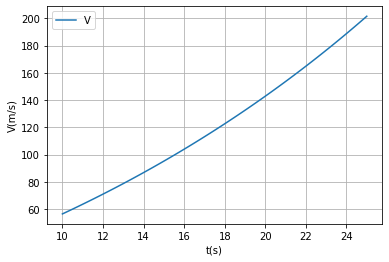

In [9]:

t = np.linspace(10,25,100) # 100 valores en el intervalo de [10,25]s

# Definimos la función 

def v(t):
    u = 950
    m = 2e5
    q = 3e3
    g = 9.8
    vel = u*np.log(m/(m - q*t)) - g*t
    return vel
vel = v(t)
plt.plot(t,vel)
plt.xlabel('t(s)')
plt.ylabel('V(m/s)')
plt.legend('Vel')
plt.grid()
plt.show()



In [11]:
# función auxiliar a evaluar
def v_aux(t):
    u = 950
    m = 2e5
    q = 3e3
    g = 9.8
    vel = u*np.log(m/(m - q*t)) - g*t - 500
    return vel

tol = 1e-8

biseccion(v_aux,10,50,tol)


(40.81587186548859, 34)

### Problema 2: Interpolación

Dadas las funciones:

1. $f (x) = sin(x^2) $

2. $f (x) = e^{sin (x)}$

3. $f (x) = \frac{0.2}{(x-3.2)^2 + 0.04}$

a) Estudiar el error en dos métodos de interpolación (de su elección) con 10,20 y 50 datos (uniformemente distribuidos) en el intervalo [0.0, 5.0] y compare los resultados.

b) Hallar los órdenes de convergencia, elabore su gráfico con el eje x en base 2 y detallar su análisis.

c) Añade una perturbación sinusoidal ($\delta g(x)=sin(x)$) del orden de $10^{-4},10^{-5}, 10^{-6}$ con distribución homogénea, grafice y detalle su análisis, ¿cuál es el error que generan con respecto a aproximación hecha en "2.a)"?

In [1]:
## Introduce tu respuesta aquí

### Problema 3: Derivación numérica

En 1928, George Gamow propuso una teoría muy exitosa del decaímiento $\alpha$, según la cual la partícula $α$ se mueve libremente dentro del núcleo y se emite después de atravesar la barrera potencial entre ella y el núcleo hijo. En otras palabras, la partícula $α$, de carga $Z_2$, cuya energía es $E$, está atrapada en un pozo potencial de radio R por la barrera potencial:

$$V(r)=\frac{Z_1Z_2e^2}{4\pi\epsilon_0 r}$$

para $r>R$.

$Z_1 =Z-2, \quad Z_2=2$, donde Z es la carga del núcleo de radio R.

$r$: es el radio fuera del núcleo ($r>R$ y con A, número de masa) donde:

$$R = 1.5\times 10^{-15}\,A^{1/3}\,{\rm m}=2.0\times 10^{-15}\,Z_1^{\,1/3}\,{\rm m}$$

a) Calcule la fuerza que experimenta la partícula y analice $\alpha$ para $r\in [R,3R]$, utilizando los tres esquemas de diferencias finitas.

b) Comparar los esquemas con la solución analítica, calcular los errores, órdenes de convergencia y detallar su análisis.

In [2]:
# Introduce tu respuesta aquí

### Problema 4: Integración numérica

La carga a partir de la densidad radial de carga lineal, $\lambda$, sobre el área de la sección transversal del cilindro, está definida por:

$$q_{total}=\int_A \lambda(r)dA(r)$$

donde, dA es el diferencial de área de la base del cilindro:

$$q_{total}=\int_A \lambda(r)(2\pi r dr)$$

Sabemos que la densidad tiene la forma:

$$\lambda(r)=\lambda_0 \left(1-\frac{r^2}{a^2} \right)$$

Y el campo eléctrico:

$$\vec{E}=\frac{kq_{total}}{d^2}\hat r$$

d: distancia de la superficie al espacio a evaluar el campo eléctrico. ($d\gt r$)


a) Determina la distribución de la carga y campo eléctrico (a R en función al radio utilizando 3 métodos de integración

b) Obtener la solución analítica, comparar los errores de distintos métodos y detallar análisis.



In [3]:
# Introduce tu respuesta aquí

### Problema 5:

Considerar un aro horizontal sin rozamiento de radio R. En este aro enhebro tres objetos con masas idénticas m, y, entre los objetos, tres muelles idénticos, cada uno con una masa constante de fuerza k.

<p align="center">
  <img src="https://habrastorage.org/webt/nz/qz/g4/nzqzg42gjarvpx3yk-fy0qgn20k.png"  width=55% />
</p>



Sabemos que, la energía cinética es:

$$T=\frac{1}{2}mR^2(\dot{\phi_1^2}+\dot{\phi_2^2}+\dot{\phi_3^2})$$

y la energía potencial:

$$U=\frac{1}{2}kR^2 [(\phi_1-\phi_2)^2+(\phi_2-\phi_3)^2+(\phi_3-\phi_1)^2]$$

Resultado: Sistema de EDOs 

$$m\frac{d^2\phi_1}{dt^2}=-k(\phi_1-\phi_2)-k(\phi_1-\phi_3)$$

$$m\frac{d^2\phi_2}{dt^2}=-k(\phi_2-\phi_3)-k(\phi_2-\phi_1)$$

$$m\frac{d^2\phi_3}{dt^2}=-k(\phi_3-\phi_1)-k(\phi_3-\phi_2)$$


a) Encontrar las ecuaciones de movimiento para cada masa usando las ecuaciones de Euler-Lagrange. *(ejemplo en PCP_sesión5.ipynb)*

b) Resolver numéricamente el sistema de ecuaciones con los métodos de Euler y RK de orden 4. Para los datos: $\phi_1=\phi_2/2,\quad \phi_2=\phi_3/2,\quad \phi_3=\pi/10 \quad $ y $\quad \phi_1'=1,\quad \phi_2'=1,\quad \phi_3'=1, \quad R=m=k=1$

c) Mostrar los resultados y explicar la dinámica del sistema en base al resultado de la simulación.

In [4]:
# Introduce tu respuesta aquí

Problema 6: (Opcional)

De las sesiones brindadas, su propia experiencia y preferencias: Definir un problema a resolver con el enfoque numérico, explique a detalle cada consideración que realice y explique sus conclusiones. 

El problema puede ser la implementación de un modelo estándar discutido en libros de física (i.e. obtener el gráfico típico de estructura de ionización del átomo de Hidrógeno.), proyecto que esté desarrollando en su formación o complementar cálculos de las sesiones.

In [5]:
# Introduce tu respuesta aquí

**Por último, debe de rellenar la siguiente encuesta de satisfacción:** https://forms.gle/4WU3ovvP7gJMj8GA7 (ingresar con el correo que se inscribió).

Enviar sus respuestas a nuestro correo: pythonclubforphysicists@gmail.com

**OJO: El correo debe de tener como asunto:**
**"Ejercicios_IIEVFC"**

*Caso contrario su solución puede quedar sin evaluar debido a la gran cantidad de correos.*


## Donaciones
<br>
<center>
Puedes donar una vez en el siguiente enlace (Ko-Fi):

<br>
    
*Click en la imagen.*

<a href="https://ko-fi.com/rcrdphysics">
<img src="https://habrastorage.org/webt/8r/ml/xf/8rmlxfpdzukegpxa62cxlfvgkqe.png" width=20% />

</center>